In [8]:
# import required libraries
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import warnings
from sklearn.preprocessing import LabelEncoder

In [81]:
train = pd.read_csv("train.csv")
train_original = train.copy()



In [82]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [83]:
train.tail()

,id,label,tweet
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."
31961,31962,0,thank you @user for you follow


In [84]:
test = pd.read_csv("test2.csv")
test_original = test.copy()

In [85]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [86]:
test.tail()

,id,tweet
17192,49155,thought factory: left-right polarisation! #tru...
17193,49156,feeling like a mermaid ð #hairflip #neverre...
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...
17195,49158,"happy, at work conference: right mindset leads..."
17196,49159,"my song ""so glad"" free download! #shoegaze ..."


# Data Pre-processing

 step-1 combining the datasets train .csv and test.csv

In [87]:

# combine the data in append
train = pd.read_csv("train.csv")
test=pd.read_csv("test2.csv")
combine=[train,test]
combine_data= pd.concat(combine)
combine_data.head()

,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is s...
1,2,0.0,@user @user thanks for #lyft credit i can't us...
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation


In [88]:
combine_data.tail()

,id,label,tweet
17192,49155,NaN,thought factory: left-right polarisation! #tru...
17193,49156,NaN,feeling like a mermaid ð #hairflip #neverre...
17194,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...
17195,49158,NaN,"happy, at work conference: right mindset leads..."
17196,49159,NaN,"my song ""so glad"" free download! #shoegaze ..."


In [89]:
combine_data['label']==0

0         True
1         True
2         True
3         True
4         True
         ...  
17192    False
17193    False
17194    False
17195    False
17196    False
Name: label, Length: 49159, dtype: bool

2.remove  the username(@)

In [90]:
combine_data['label']==1

0        False
1        False
2        False
3        False
4        False
         ...  
17192    False
17193    False
17194    False
17195    False
17196    False
Name: label, Length: 49159, dtype: bool

In [91]:

def remove_pattern (input_text,pattern):
  #re.findall will substitute inthe test and will put it in a list  
    r = re.findall (pattern,input_text)
# re.sub will substitute all the @ with an empty characters
    for i in r:
        input_text = re.sub (i,'',input_text)
            
    return input_text

In [92]:

combine_data['tidy_tweet'] = np.vectorize(remove_pattern)(combine_data["tweet"],"@[\w]*")
combine_data.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


Removing number and special characters

In [93]:
combine_data['tidy_tweet'] = combine_data['tidy_tweet'].str.replace("[^a-zA-Z#]"," ")


In [94]:
combine_data.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


Removing short words

In [95]:
combine_data['tidy_tweet'] = combine_data['tidy_tweet'] .apply(lambda x: ''.join([w for w in x.split() if len(w)>3]))
                                                                     
                                                                                 

In [96]:
 combine_data['tidy_tweet'].head()

0    whenfatherdysfunctionalselfishdragskidsintodys...
1    thanks#lyftcreditcan'tcausetheydon'tofferwheel...
2                                    bihdayyourmajesty
3    #modellovetakewithtimeurð±!!!ðððð...
4                        factsguide:society#motivation
Name: tidy_tweet, dtype: object

Tokenization

In [97]:
tokenized_tweet = combine_data['tidy_tweet'].apply(lambda x: x.split())

In [98]:
tokenized_tweet.head()

0    [whenfatherdysfunctionalselfishdragskidsintody...
1    [thanks#lyftcreditcan'tcausetheydon'tofferwhee...
2                                  [bihdayyourmajesty]
3    [#modellovetakewithtimeurð±!!!ðððð...
4                      [factsguide:society#motivation]
Name: tidy_tweet, dtype: object

stemmer

In [99]:
from nltk.stem.porter import*
stemmer = PorterStemmer()


In [100]:
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i)for i  in x]) #strem


In [29]:
tokenized_tweet.head()

0    [whenfatherdysfunctionalselfishdragskidsintody...
1    [thanks#lyftcreditcan'tcausetheydon'tofferwhee...
2                                  [bihdayyourmajesti]
3    [#modellovetakewithtimeurð±!!!ðððð...
4                           [factsguide:society#motiv]
Name: tidy_tweet, dtype: object

lets combine the data back:

In [30]:


combine_data['tidy_tweet'] = tokenized_tweet
combine_data.head()

    
                          
    

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,[whenfatherdysfunctionalselfishdragskidsintody...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,[thanks#lyftcreditcan'tcausetheydon'tofferwhee...
2,3,0.0,bihday your majesty,[bihdayyourmajesti]
3,4,0.0,#model i love u take with u all the time in ...,[#modellovetakewithtimeurð±!!!ðððð...
4,5,0.0,factsguide: society now #motivation,[factsguide:society#motiv]


 Data Visualization

In [31]:
from wordcloud import WordCloud ,ImageColorGenerator
from PIL import Image
import urllib
import requests

In [32]:


combine_data['Tidy_tweet'] =( combine_data['tidy_tweet'].apply(str))
all_words = (combine_data['Tidy_tweet'])
display(all_words)

0        ['whenfatherdysfunctionalselfishdragskidsintod...
1        ["thanks#lyftcreditcan'tcausetheydon'tofferwhe...
2                                    ['bihdayyourmajesti']
3        ['#modellovetakewithtimeurð\x9f\x93±!!!ð\x9f\x...
4                             ['factsguide:society#motiv']
                               ...                        
17192    ['thoughtfactory:left-rightpolarisation!#trump...
17193    ['feelinglikemermaidð\x9f\x98\x98#hairflip#nev...
17194    ['#hillary#campaignedtoday#ohio((omg))&amp;use...
17195    ['happy,workconference:rightmindsetleadscultur...
17196    ['songglad"freedownload!#shoegaze#newmusic#new...
Name: Tidy_tweet, Length: 49159, dtype: object

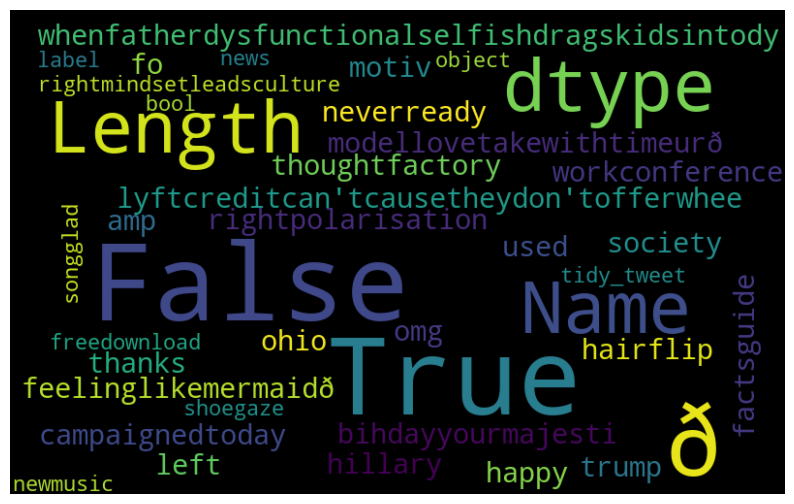

In [33]:
all_words=([combine_data['tidy_tweet'],[combine_data['label'] == 0]])
all_positive_words = ",".join([str(text)for text in all_words])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500,random_state=21,  max_font_size=110).generate(all_positive_words)
plt.figure(figsize=(10, 7),facecolor = None)
plt.imshow(wordcloud,interpolation="bilinear" )
plt.axis('off')

plt.show()

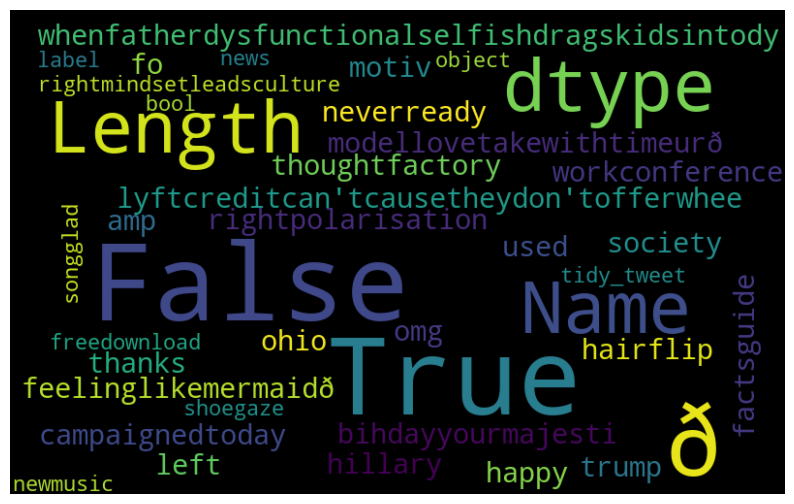

In [34]:
normal_words=([combine_data['tidy_tweet'][combine_data['label']==0]])
all_normal_words = ",".join([str(text)for text in all_words])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500,random_state=21,  max_font_size=110).generate(all_normal_words)
plt.figure(figsize=(10, 7),facecolor = None)
plt.imshow(wordcloud,interpolation="bilinear" )
plt.axis('off')

plt.show()

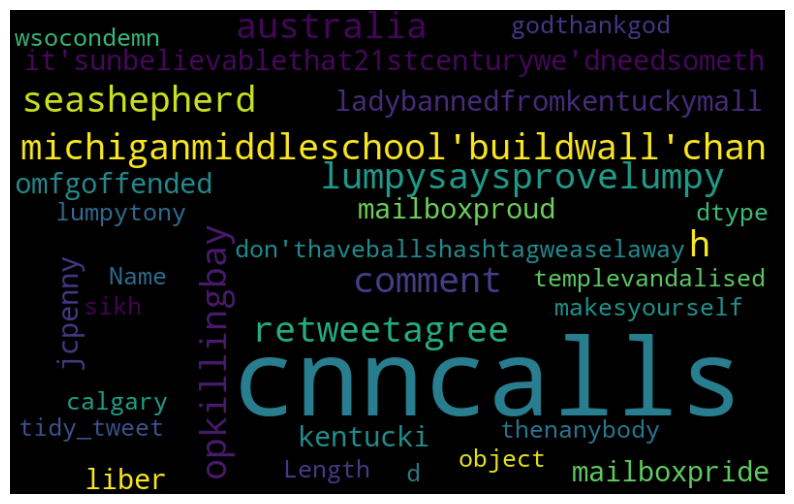

In [35]:
all_words=([combine_data['tidy_tweet'][combine_data['label'] == 1]])
all_negative_words = ",".join([str(text)for text in all_words])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500,random_state=21,  max_font_size=110).generate(all_negative_words)
plt.figure(figsize=(10, 7),facecolor=None)
plt.imshow(wordcloud,interpolation="bilinear" )
plt.axis('off')

plt.show()

In [36]:





positive_hashtags =(combine_data['tidy_tweet'][combine_data['label']==0])


positive_hashtags

0        [whenfatherdysfunctionalselfishdragskidsintody...
1        [thanks#lyftcreditcan'tcausetheydon'tofferwhee...
2                                      [bihdayyourmajesti]
3        [#modellovetakewithtimeurð±!!!ðððð...
4                               [factsguide:society#motiv]
                               ...                        
31956              [fishingtomorrowcarntwaitfirsttimeyear]
31957    [thatyouuu?ððððððððð...
31958    [ninaturnerairwavestryingwrapherselfmantlegenu...
31959                    [listeningsongsmondaymorningwork]
31961                                        [thankfollow]
Name: tidy_tweet, Length: 29720, dtype: object

In [37]:

positive_hashtags =(combine_data['tidy_tweet'][combine_data['label']==0])


positive_hashtags

0        [whenfatherdysfunctionalselfishdragskidsintody...
1        [thanks#lyftcreditcan'tcausetheydon'tofferwhee...
2                                      [bihdayyourmajesti]
3        [#modellovetakewithtimeurð±!!!ðððð...
4                               [factsguide:society#motiv]
                               ...                        
31956              [fishingtomorrowcarntwaitfirsttimeyear]
31957    [thatyouuu?ððððððððð...
31958    [ninaturnerairwavestryingwrapherselfmantlegenu...
31959                    [listeningsongsmondaymorningwork]
31961                                        [thankfollow]
Name: tidy_tweet, Length: 29720, dtype: object

In [38]:
positive_hashtags_unnested =sum(positive_hashtags,[])
positive_hashtags_unnested

['whenfatherdysfunctionalselfishdragskidsintodysfunction.#run',
 "thanks#lyftcreditcan'tcausetheydon'tofferwheelchairvanspdx.#disapointed#getthank",
 'bihdayyourmajesti',
 '#modellovetakewithtimeurð\x9f\x93±!!!ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦',
 'factsguide:society#motiv',
 '[2/2]hugefaretalkingbeforetheyleave.chaosdisputeswhentheythere.#allshowandnogo',
 'campingtomorrowdannyâ\x80¦',
 "nextschoolyearyearexams.ð\x9f\x98¯can'tthinkaboutthatð\x9f\x98\xad#school#exams#hate#imagine#actorslife#revolutionschool#girl",
 'won!!!loveland!!!#allin#cavs#champions#cleveland#clevelandcavali',
 "welcomehereit's#gr8",
 '#irelandconsumerpriceindex(mom)climbedfromprevious0.2%0.5%#blog#silver#gold#forex',
 'selfish.#orlando#standwithorlando#pulseshooting#orlandoshooting#biggerproblems#selfish#heabreaking#values#lov',
 'daddytoday!!#80days#gettingf',
 'ouch...juniorangryð\x9f\x98\x90#got7#junior#yugyoem#omg',
 'thankfulhavingpaner.#thankful#posit',
 '#friday!

In [39]:
negative_hashtags =(combine_data['tidy_tweet'][combine_data['label']==1])
negative_hashtags

13       [#cnncalls#michiganmiddleschool'buildwall'chan...
14       [comment!#australia#opkillingbay#seashepherd#h...
17                                         [retweetagree!]
23                                  [lumpysaysprovelumpy.]
34       [it'sunbelievablethat21stcenturywe'dneedsometh...
                               ...                        
31934       [ladybannedfromkentuckymall.#jcpenny#kentucki]
31946    [omfgoffended!mailboxproud!#mailboxpride#liber...
31947    [don'thaveballshashtagweaselaway..lumpytony..d...
31948    [makesyourself,thenanybody?until....godthankgod!]
31960         [#sikh#templevandalised#calgary,#wsocondemn]
Name: tidy_tweet, Length: 2242, dtype: object

In [40]:
negative_hashtags_unnested =sum(negative_hashtags,[])
negative_hashtags_unnested

["#cnncalls#michiganmiddleschool'buildwall'chant#tcot",
 'comment!#australia#opkillingbay#seashepherd#helpcovedolphins#thecove#helpcovedolphin',
 'retweetagree!',
 'lumpysaysprovelumpy.',
 "it'sunbelievablethat21stcenturywe'dneedsomethinglikethis.again.#neverump#xenophobia",
 'letsfightagainst#love#peac',
 "ð\x9f\x98©thewhiteestablishmentcan'thavefolxrunningaroundlovingthemselvespromotinggreat",
 "hey,whitepeople:callpeople'white'#race#identity#medâ\x80¦",
 '#altrightuses&amp;insecuritylureinto#whitesupremaci',
 "interested#linguisticsthatdoesn'taddress#race&amp;racismabout#power.#raciolinguisticsbringsâ\x80¦",
 'mockedobamabeingblack.#brexit',
 "#peoplearen'tprotesting#trumpbecause#republicanwon-theybecausetrumpfuhered&amp;â\x80¦",
 "it'swhencall#michelleobamagorillabecauseracistshavelongthoughtblackpeoplebetâ\x80¦",
 'smallerhandsshow,barryprobablyliedaboutbeing#knicksgamesuckedmorethan#golfâ\x80¦',
 'pointfingermillionspointedrightbackyou,#jewishsupremacist',
 'mightlibtardif...#lib

In [41]:
positive_word_freq = nltk.FreqDist(positive_hashtags_unnested)
positive_word_freq

FreqDist({'#modellovetakewithtimeurð\x9f\x93±!!!ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦': 325, 'finallyfounddeletetweets!mightfindusefulwell:#deletetweet': 83, "yeahit'sgoodbingbongbingbong": 75, '#gratefulthat#affirm': 57, '#lighttherapyhelpwith#depression?#altwaystoheal#healthy#happi': 31, 'ð\x9f\x94\x9d#love#instagood#photoofthedaytop.tags#tbt#cute#beautiful#followme#followâ\x80¦': 31, 'haveloverstopbeingangryvisitus..&gt;&gt;&gt;#lover#friend#astrologer#lov': 26, 'best#essentialoils#anxiety#healthy#peace#altwaystoh': 26, '#lighttherapyhelpwith#sad#depression?#altwaystoheal#healthi': 24, '#flagday2016#flag#day#2016#(30#photos)thingsabout"flag2016":': 22, ...})

In [42]:
positive_df = pd.DataFrame({'Hashtags': list(positive_word_freq.keys()),'Count' : list(positive_word_freq.values())})
positive_df

,Hashtags,Count
0,whenfatherdysfunctionalselfishdragskidsintodys...,1
1,thanks#lyftcreditcan'tcausetheydon'tofferwheel...,1
2,bihdayyourmajesti,3
3,#modellovetakewithtimeurð±!!!ðððð...,325
4,factsguide:society#motiv,1
...,...,...
26575,fishingtomorrowcarntwaitfirsttimeyear,1
26576,thatyouuu?ððððððððð...,1
26577,ninaturnerairwavestryingwrapherselfmantlegenui...,1
26578,listeningsongsmondaymorningwork,1


C:\Users\HP\anaconda3\New folder\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 159 (\x9f) missing from current font.
  func(*args, **kwargs)
C:\Users\HP\anaconda3\New folder\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 147 (\x93) missing from current font.
  func(*args, **kwargs)
C:\Users\HP\anaconda3\New folder\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 152 (\x98) missing from current font.
  func(*args, **kwargs)
C:\Users\HP\anaconda3\New folder\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 153 (\x99) missing from current font.
  func(*args, **kwargs)
C:\Users\HP\anaconda3\New folder\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 142 (\x8e) missing from current font.
  func(*args, **kwargs)
C:\Users\HP\anaconda3\New folder\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 145 (\x91) missing from current font.
  func(*args, **kwargs)
C:\Users\HP\anaconda3\New folder\Lib\site-pack

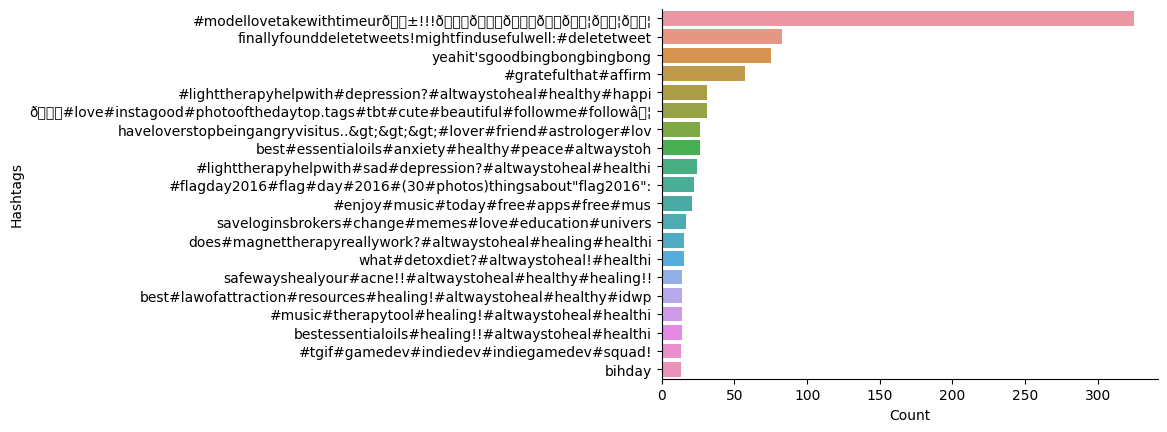

In [43]:

positive_df_plot = positive_df.nlargest(20,columns='Count')

sns.barplot(data=positive_df_plot,y='Hashtags',x='Count')
sns.despine()


In [44]:
negative_word_freq = nltk.FreqDist(negative_hashtags_unnested)
negative_word_freq

FreqDist({'mightlibtardif...#libtard#sjw#liberal#polit': 72, '#sikh#templevandalised#calgary,#wsocondemn': 26, '#feminismiscancer#feminismisterrorism#feminismmuktbharat#malevoteignor': 20, '#black&amp;feellikestompingyou?listen#retweet#tampa#miamiâ\x80¦': 18, 'shepherdsuppoersracist!#antiracism#seashepherd': 17, "#peoplearen'tprotesting#trumpbecause#republicanwon-theybecausetrumpfuhered&amp;â\x80¦": 11, '#hispanic&amp;feellikestompingyou?listen#retweet#boricuaâ\x80¦': 9, 'thoughtfactory:left-rightpolarisation!#trump#uselections2016#leadership#politics#brexit#blm': 9, 'ð\x9f\x8c\x8eteamwith#new&amp;showwhat#phillysuppophilly&amp;combat': 6, 'nothingwouldmoredangerousthangive#putinschoiceimpressionaccept#stopracism#boycott?â\x80¦': 6, ...})

In [45]:
negative_df = pd.DataFrame({'Hashtags': list(negative_word_freq.keys()),'Count' : list(negative_word_freq.values())})
negative_df

,Hashtags,Count
0,#cnncalls#michiganmiddleschool'buildwall'chant...,2
1,comment!#australia#opkillingbay#seashepherd#he...,1
2,retweetagree!,1
3,lumpysaysprovelumpy.,1
4,it'sunbelievablethat21stcenturywe'dneedsomethi...,1
...,...,...
1852,judd&amp;#homophobic#freemilo#milo#freemilo#mi...,1
1853,ladybannedfromkentuckymall.#jcpenny#kentucki,1
1854,omfgoffended!mailboxproud!#mailboxpride#libera...,1
1855,don'thaveballshashtagweaselaway..lumpytony..di...,1


C:\Users\HP\anaconda3\New folder\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 128 (\x80) missing from current font.
  func(*args, **kwargs)
C:\Users\HP\anaconda3\New folder\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 159 (\x9f) missing from current font.
  func(*args, **kwargs)
C:\Users\HP\anaconda3\New folder\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 140 (\x8c) missing from current font.
  func(*args, **kwargs)
C:\Users\HP\anaconda3\New folder\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 142 (\x8e) missing from current font.
  func(*args, **kwargs)
C:\Users\HP\anaconda3\New folder\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\HP\anaconda3\New folder\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 159 (\x9f) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


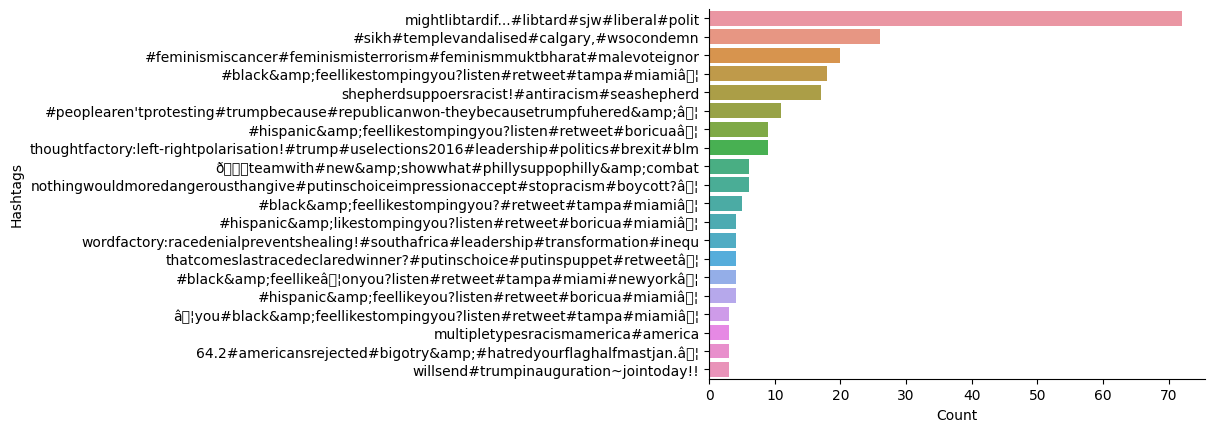

In [46]:
negative_df_plot = negative_df.nlargest(20,columns='Count')

sns.barplot(data=negative_df_plot,y='Hashtags',x='Count')
sns.despine()